In [17]:
import thinkdsp
import thinkplot
import matplotlib
import matplotlib.pyplot as plt

In [18]:
from scipy import signal
import numpy as np

In [19]:
# Generate the noisy Sin-Signal
sin_sig = thinkdsp.SinSignal(freq=5.0, amp=1.0, offset=0) # Sin with 5 Hz
thinkdsp.random_seed(42) # We need a random number for noise
noise_sig = thinkdsp.UncorrelatedGaussianNoise(amp=0.5) # Noise with 0.5 Amplitude
sin_wave = sin_sig.make_wave(duration=2.5, framerate=100) # Wave with 2.5 s length
noise_wave = noise_sig.make_wave(duration=2.5, framerate=100)
noisy_wave = sin_wave + noise_wave # Noisy signal with SNR of 4.0

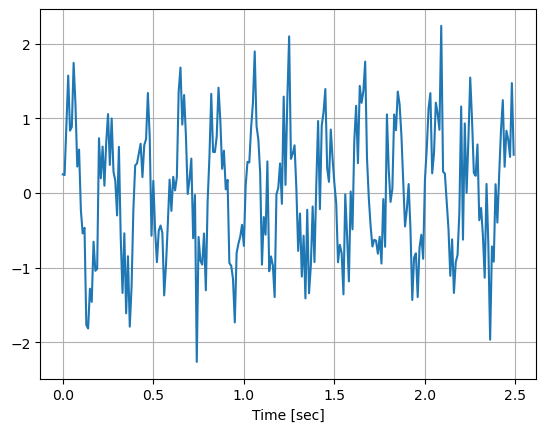

In [20]:
noisy_wave.plot()
plt.xlabel('Time [sec]')
plt.grid()	

## Filterdesign Elliptic Filter
Nach dem Butterworth und FIR Filter noch ein weiteres Design eines IIR Filters.
Das Elliptic oder Cauer Filter zeichnet sich durch eine sehr steile Flanke aus.
Wir benutzen das generierte, verrauschte Sinussignal und legen
den Filter nach den gleichen Kriterien aus.

In [21]:
# Filter requirements.
order = 6
fs = 100.0     # sample rate in Hz
cutoff = 8.0  # desired cutoff frequency of the filter in Hz
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq

# Generate Filter coefficients
#b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
b, a = signal.ellip(order, 2, 40, normal_cutoff, 'low', analog=False)
print(b, a)

[ 0.01333149 -0.05328312  0.10644122 -0.13104719  0.10644122 -0.05328312
  0.01333149] [  1.          -5.20051735  11.69924606 -14.51363004  10.4537978
  -4.1425791    0.70611485]


Die Frequenzantwort interessiert natürlich brennend.

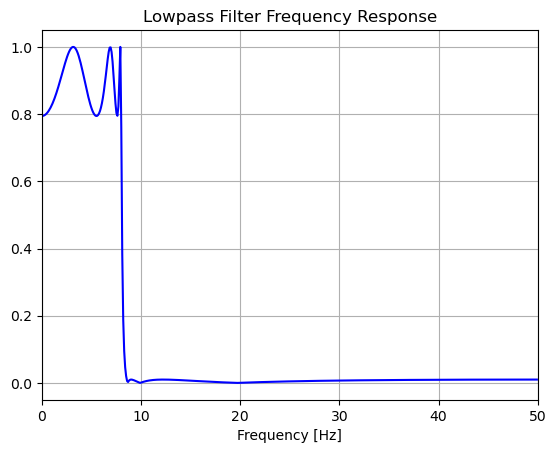

In [22]:
# Get the frequency response.
w, h = signal.freqz(b, a)

# Plot the Frequency Response
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

Wie erwartet besitzt der Filter eine sehr steile Flanke, allerdings auch recht viel "Ripple" im Passband.
Das führt zu einer nicht unerheblichen und nichtlinearen Dämpfung für die Signale im Durchlassbereich. 

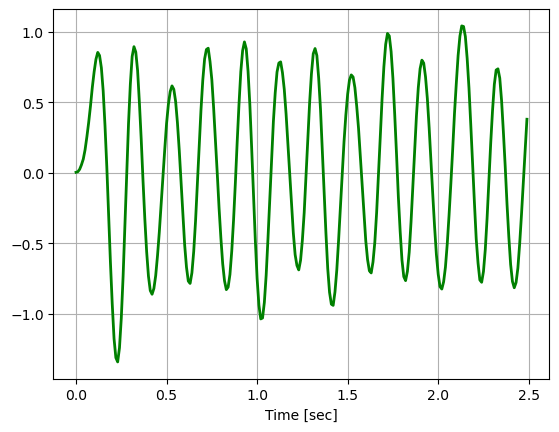

In [23]:
signal_data = noisy_wave.ys # Access the wave data array as input for the filter

T = noisy_wave.duration	# Time to plot later
n = len(noisy_wave.ys)	# length of the signal for plotting
t = np.linspace(0, T, n, endpoint=False) # x-Axis for plotting (t is time)

# Filter the data, and plot both the original and filtered signals.
y = signal.lfilter(b, a, signal_data)

plt.plot(t, y, 'g-', linewidth=2, label='filtered data') # plot the data with labels
plt.xlabel('Time [sec]')
plt.grid()

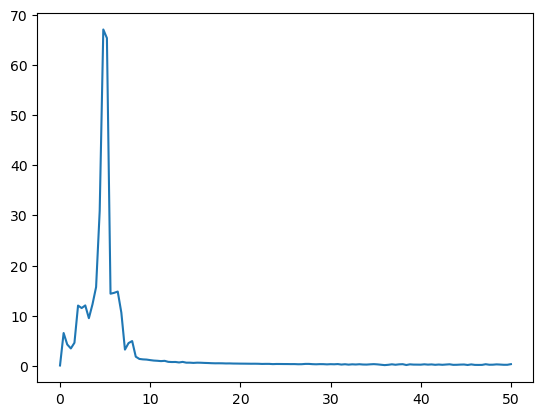

In [24]:
noisy_wave.ys = y
spectrum = noisy_wave.make_spectrum()
spectrum.plot()

Das Spektrum zeigt, dass der Elliptic Filter die höheren Frequenzen ab ca. 10Hz stark dämpft.

In [25]:
# Generate Filter coefficients
cutoff_high = 10 / nyq
cutoff_low = 3 / nyq
b, a = signal.ellip(order, 2, 40, (cutoff_low,cutoff_high), 'bandpass', analog=False)
print(b, a)

[ 0.01236812 -0.12074931  0.55806553 -1.61920779  3.29298487 -4.95463326
  5.66234368 -4.95463326  3.29298487 -1.61920779  0.55806553 -0.12074931
  0.01236812] [   1.          -10.6713502    53.09455335 -162.82689961  342.73399001
 -521.5779879   588.39067184 -495.75023963  309.62890759 -139.81319495
   43.33247501   -8.27839873    0.73747547]


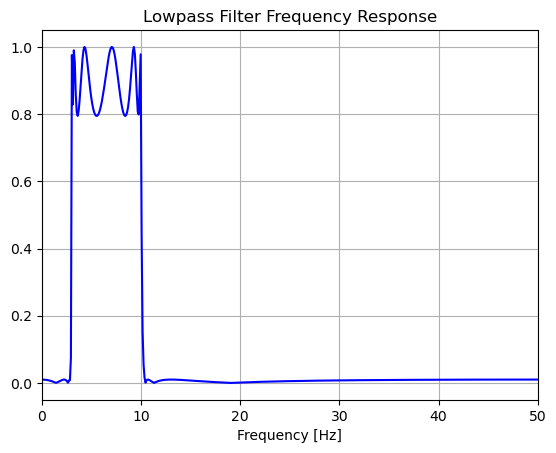

In [26]:
# Get the frequency response.
w, h = signal.freqz(b, a)

# Plot the Frequency Response
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

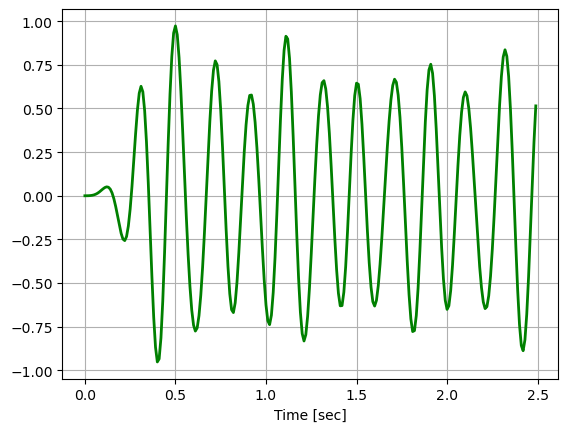

In [27]:
signal_data = noisy_wave.ys # Access the wave data array as input for the filter

T = noisy_wave.duration	# Time to plot later
n = len(noisy_wave.ys)	# length of the signal for plotting
t = np.linspace(0, T, n, endpoint=False) # x-Axis for plotting (t is time)

# Filter the data, and plot both the original and filtered signals.
y = signal.lfilter(b, a, signal_data)

plt.plot(t, y, 'g-', linewidth=2, label='filtered data') # plot the data with labels
plt.xlabel('Time [sec]')
plt.grid()

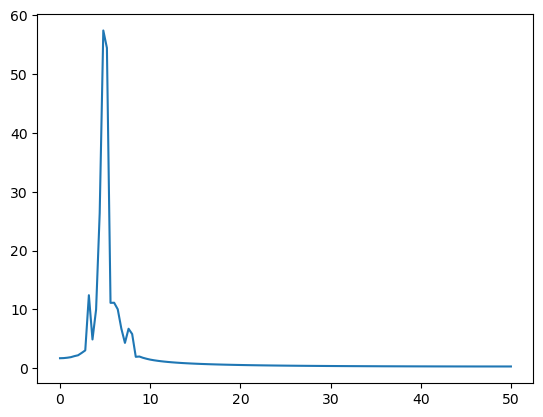

In [28]:
noisy_wave.ys = y
spectrum = noisy_wave.make_spectrum()
spectrum.plot()